
**ED1 - Lena**

Aluno: Mauricio dos Santos de Jesus

**A partir da imagem lena.pgm, crie um algoritmo que faça a seguinte animação:**

>

a. Piscar o olho direito ou esquerdo 5 vezes.

b. Dica: selecionar uma região acima do olho e fazer translacoes seguidas sobre
o olho.

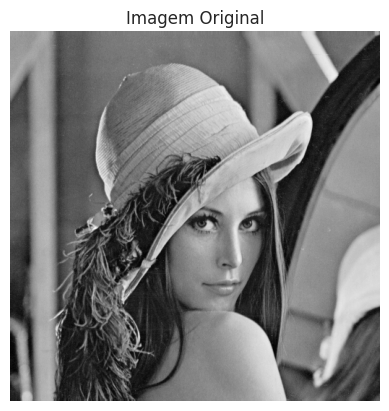

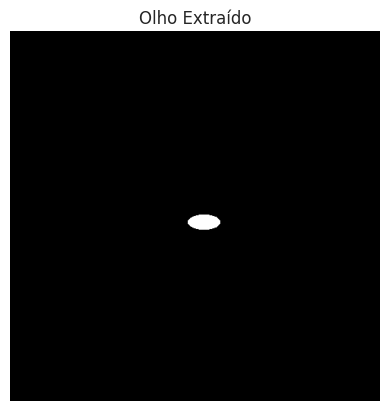

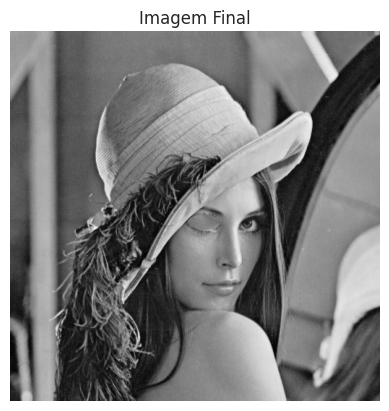

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import imageio
import seaborn as sns  # Importe a biblioteca seaborn

# Use o estilo seaborn diretamente
sns.set(style='whitegrid')

%matplotlib inline

def carregar_e_converter_imagem(caminho_imagem):
    # Carrega a imagem e converte para escala de cinza
    img = cv.imread(caminho_imagem)
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def criar_mascara_elipse(shape, centro, eixo):
    # Cria uma máscara elíptica
    mascara = np.zeros(shape, np.uint8)
    cv.ellipse(mascara, centro, eixo, 0, 0, 360, 255, -1)
    return mascara

def exibir_imagem(imagem, titulo="Imagem", cmap="gray"):
    # Exibe a imagem
    plt.imshow(imagem, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def main():
    caminho_imagem = "/content/lena.pgm"
    imagem = carregar_e_converter_imagem(caminho_imagem)

    # Extrai o olho
    centro_elipse = (268, 264)
    eixo_elipse = (22, 10)
    mascara = criar_mascara_elipse(imagem.shape, centro_elipse, eixo_elipse)

    # Aplica a máscara na imagem original
    imagem_mascarada = cv.bitwise_and(imagem, imagem, mask=mascara)
    imagem_mascarada[imagem_mascarada > 0] = 1

    # Translada para obter a cor
    M = np.float32([[1, 0, 0], [0, 1, -100]])
    imagem_transladada = cv.warpAffine(imagem, M, (imagem.shape[1], imagem.shape[0]))

    # Substitui a cor no olho
    imagem_final = imagem.copy()
    r, c = np.where(imagem_mascarada == 1)
    imagem_final[r, c] = imagem_transladada[r, c]

    # Exibe as imagens
    exibir_imagem(imagem, titulo="Imagem Original")
    exibir_imagem(imagem_mascarada, titulo="Olho Extraído")
    exibir_imagem(imagem_final, titulo="Imagem Final")

    # Cria um gif com o olho piscando 5 vezes
    imagens = [imagem, imagem_final]
    imageio.mimsave('/content/eye.gif', imagens, duration=1.2)

if __name__ == "__main__":
    main()
